<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(1_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.2_n250.csv',
 'data_multi_delta_1.2_n120.csv',
 'data_multi_delta_1.2_n60.csv',
 'data_multi_delta_1.2_n30.csv',
 'data_multi_delta_1.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,26.295877,-5.601643,30.694233,34.069815,-3.375582
1,0.0,1.0,45.357622,6.284203,61.641825,52.341559,9.300266
2,0.0,2.0,23.140092,-14.702080,18.438011,31.044820,-12.606808
3,0.0,3.0,95.585809,-2.786889,102.798920,100.488071,2.310849
4,0.0,4.0,33.112187,-8.886330,34.225858,40.603628,-6.377770
...,...,...,...,...,...,...,...
19995,999.0,15.0,39.254294,7.048181,56.302475,55.053684,1.248790
19996,999.0,16.0,66.646266,0.738255,77.384521,77.253735,0.130785
19997,999.0,17.0,61.501714,-3.452341,68.049373,73.084291,-5.034917
19998,999.0,18.0,89.892525,-16.300868,83.591656,96.093858,-12.502202


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,26.295877,-5.601643,30.694233,34.069815,-3.375582
1,0.0,1.0,45.357622,6.284203,61.641825,52.341559,9.300266
2,0.0,2.0,23.140092,-14.702080,18.438011,31.044820,-12.606808
3,0.0,3.0,95.585809,-2.786889,102.798920,100.488071,2.310849
4,0.0,4.0,33.112187,-8.886330,34.225858,40.603628,-6.377770
...,...,...,...,...,...,...,...
19995,999.0,15.0,39.254294,7.048181,56.302475,55.053684,1.248790
19996,999.0,16.0,66.646266,0.738255,77.384521,77.253735,0.130785
19997,999.0,17.0,61.501714,-3.452341,68.049373,73.084291,-5.034917
19998,999.0,18.0,89.892525,-16.300868,83.591656,96.093858,-12.502202


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    26.295877  -5.601643   30.694233   34.069815  -3.375582
      1.0    45.357622   6.284203   61.641825   52.341559   9.300266
      2.0    23.140092 -14.702080   18.438011   31.044820 -12.606808
      3.0    95.585809  -2.786889  102.798920  100.488071   2.310849
      4.0    33.112187  -8.886330   34.225858   40.603628  -6.377770
...                ...        ...         ...         ...        ...
999.0 15.0   39.254294   7.048181   56.302475   55.053684   1.248790
      16.0   66.646266   0.738255   77.384521   77.253735   0.130785
      17.0   61.501714  -3.452341   68.049373   73.084291  -5.034917
      18.0   89.892525 -16.300868   83.591656   96.093858 -12.502202
      19.0   92.169793 -17.142339   85.027454   97.939489 -12.912035

[20000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    26.295877  -5.601643   30.694233   34.069815  -3.375582
      1.0    45.357622   6.284203   61.641825   52.341559   9.300266
      2.0    23.140092 -14.702080   18.438011   31.044820 -12.606808
      3.0    95.585809  -2.786889  102.798920  100.488071   2.310849
      4.0    33.112187  -8.886330   34.225858   40.603628  -6.377770
...                ...        ...         ...         ...        ...
999.0 15.0   39.254294   7.048181   56.302475   55.053684   1.248790
      16.0   66.646266   0.738255   77.384521   77.253735   0.130785
      17.0   61.501714  -3.452341   68.049373   73.084291  -5.034917
      18.0   89.892525 -16.300868   83.591656   96.093858 -12.502202
      19.0   92.169793 -17.142339   85.027454   97.939489 -12.912035

[20000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,26.295877,-5.601643,30.694233,34.069815,-3.375582
1,0.0,1.0,45.357622,6.284203,61.641825,52.341559,9.300266
2,0.0,2.0,23.140092,-14.702080,18.438011,31.044820,-12.606808
3,0.0,3.0,95.585809,-2.786889,102.798920,100.488071,2.310849
4,0.0,4.0,33.112187,-8.886330,34.225858,40.603628,-6.377770
...,...,...,...,...,...,...,...
19995,999.0,15.0,39.254294,7.048181,56.302475,55.053684,1.248790
19996,999.0,16.0,66.646266,0.738255,77.384521,77.253735,0.130785
19997,999.0,17.0,61.501714,-3.452341,68.049373,73.084291,-5.034917
19998,999.0,18.0,89.892525,-16.300868,83.591656,96.093858,-12.502202


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    26.295877  -5.601643   30.694233   34.069815  -3.375582
      1.0    45.357622   6.284203   61.641825   52.341559   9.300266
      2.0    23.140092 -14.702080   18.438011   31.044820 -12.606808
      3.0    95.585809  -2.786889  102.798920  100.488071   2.310849
      4.0    33.112187  -8.886330   34.225858   40.603628  -6.377770
...                ...        ...         ...         ...        ...
999.0 15.0   39.254294   7.048181   56.302475   55.053684   1.248790
      16.0   66.646266   0.738255   77.384521   77.253735   0.130785
      17.0   61.501714  -3.452341   68.049373   73.084291  -5.034917
      18.0   89.892525 -16.300868   83.591656   96.093858 -12.502202
      19.0   92.169793 -17.142339   85.027454   97.939489 -12.912035

[20000 rows x 5 columns]

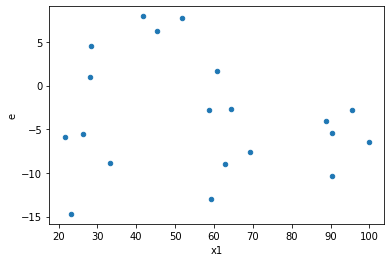

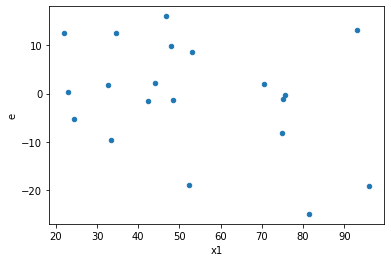

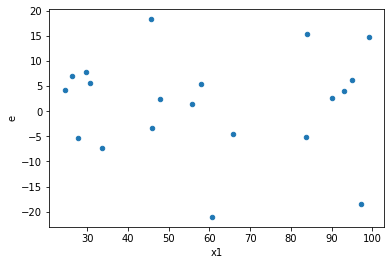

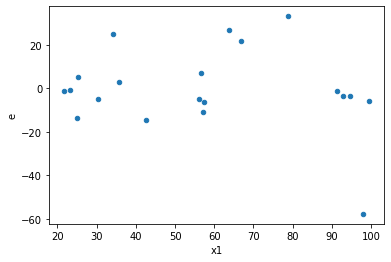

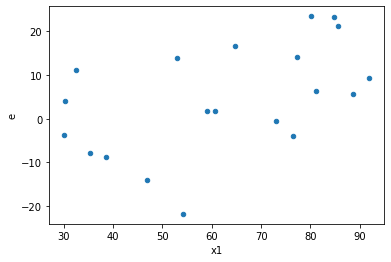

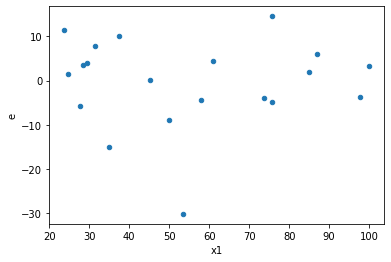

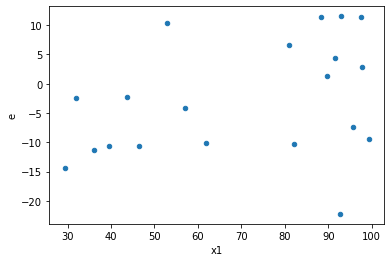

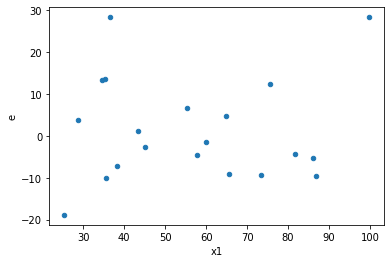

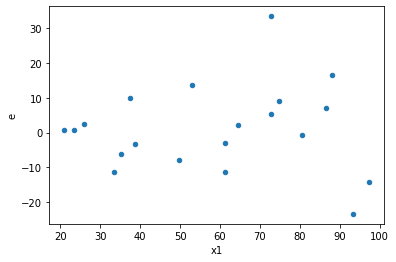

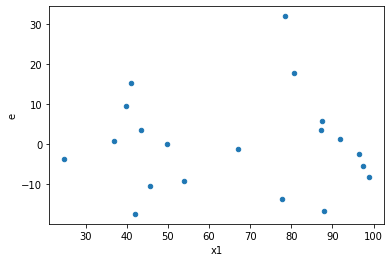

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,7.0,7.0,413.2993382894453,1032.0715201344362,59.0427626127779,147.43878859063375,2.497152607129623,0.2503276821572178,0.8748361589213911,0.1251638410786089,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,479.37125863719837,860.8639627868691,68.48160837674263,122.98056611240987,1.795818892509772,0.4578630568843307,0.7710684715578346,0.22893152844216536,Reject001=1 : Homoscedasticity
3.0,7.0,7.0,1099.1393374841734,2578.668649535908,157.01990535488193,368.3812356479869,2.3460798477454534,0.2831021358484622,0.8584489320757689,0.1415510679242311,Reject001=1 : Homoscedasticity
6.0,7.0,7.0,299.00785434486323,922.1768517510766,42.71540776355189,131.7395502501538,3.0841225016366165,0.16042570067910966,0.9197871496604452,0.08021285033955483,Reject001=1 : Homoscedasticity
8.0,7.0,7.0,281.15769071440366,1127.6706891479953,40.16538438777195,161.0958127354279,4.0108121754829344,0.08704783167925889,0.9564760841603706,0.043523915839629446,Reject001=1 : Homoscedasticity
10.0,7.0,7.0,77.85135550513697,1572.7768794725193,11.121622215019567,224.68241135321705,20.20230565373702,0.0007731877667684905,0.9996134061166158,0.0003865938833842453,Reject001=0 : Heteroscedasticity
11.0,7.0,7.0,250.05279028123178,3337.257468482258,35.72182718303311,476.75106692603686,13.346211672858676,0.0028985593517760755,0.998550720324112,0.0014492796758880377,Reject001=0 : Heteroscedasticity
12.0,7.0,7.0,471.4278585171974,1291.4373618161487,67.34683693102821,184.49105168802126,2.7394167283158932,0.207054161709608,0.896472919145196,0.103527080854804,Reject001=1 : Homoscedasticity
13.0,7.0,7.0,438.662621430265,985.8370501723996,62.666088775752144,140.8338643103428,2.2473696230557905,0.30742331198580075,0.8462883440070996,0.15371165599290038,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,232.68917749622202,54.34068629228136,33.24131107088886,7.762955184611623,0.23353336359257035,0.0740725867914757,Reject001=1 : Homoscedasticity
1.0,7.0,7.0,413.2993382894453,1032.0715201344362,59.0427626127779,147.43878859063375,2.497152607129623,0.2503276821572178,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,479.37125863719837,860.8639627868691,68.48160837674263,122.98056611240987,1.795818892509772,0.4578630568843307,Reject001=1 : Homoscedasticity
3.0,7.0,7.0,1099.1393374841734,2578.668649535908,157.01990535488193,368.3812356479869,2.3460798477454534,0.2831021358484622,Reject001=1 : Homoscedasticity
4.0,7.0,7.0,969.2111546417759,671.8710525657541,138.45873637739655,95.98157893796487,0.6932143210981514,0.64084119597007,Reject001=1 : Homoscedasticity
5.0,7.0,7.0,523.4388114344313,292.40608507954386,74.77697306206161,41.772297868506264,0.5586251510052043,0.4602801765956217,Reject001=1 : Homoscedasticity
6.0,7.0,7.0,299.00785434486323,922.1768517510766,42.71540776355189,131.7395502501538,3.0841225016366165,0.16042570067910966,Reject001=1 : Homoscedasticity
7.0,7.0,7.0,1448.1920228058118,999.0854226769729,206.88457468654454,142.72648895385328,0.6898846333522032,0.6364842890031881,Reject001=1 : Homoscedasticity
8.0,7.0,7.0,281.15769071440366,1127.6706891479953,40.16538438777195,161.0958127354279,4.0108121754829344,0.08704783167925889,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      896
Reject001=0 : Heteroscedasticity    104
Name: Result_test, dtype: int64